In [17]:
%matplotlib notebook

import os, glob, sys, tqdm
import anndata as ad
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from importlib import reload

sys.path.append('utils')
import step03_label_transfer as funcs

from matplotlib import rc

plt.rcParams.update({'font.size': 15})
rc('font', size=12)
rc('font', family='Arial')
# plt.style.use('dark_background')
rc('pdf', fonttype=42)


In [18]:
hpf = 12

hpf_scrna = hpf
if hpf == 12:
    hpf_scrna = 14
    
print(hpf, hpf_scrna)
scrnaseq_folder = os.path.join('..','zebrafish_Wagner_data')
scrnaseq_file = glob.glob(os.path.join(scrnaseq_folder,'*_hvg_%02dhpf.h5ad'%hpf_scrna))[0]

hcr_files = [
    os.path.join('..','HCR_time_course',i,'HCRcell_scrnaseq_mapped_alpha09.h5')
        for i in [
                os.path.join('hpf06'),
                os.path.join('hpf08'),
                os.path.join('hpf10'),
                os.path.join('hpf12')
            ]
    ]
hcr_file = os.path.join('..','HCR_time_course','mapped_grid_hires_hpf12_nlocs-20663_alpha-1_tol-0.0001_eps-0.005_nS-10_nT-10_NO-.h5ad')

print(scrnaseq_file)
print(hcr_file)

12 14
..\zebrafish_Wagner_data\WagnerScience2018_hvg_14hpf.h5ad
..\HCR_time_course\mapped_grid_hires_hpf12_nlocs-20663_alpha-1_tol-0.0001_eps-0.005_nS-10_nT-10_NO-.h5ad


# Load gene expression data

In [19]:
scrna, n_scrna_cells, n_scrna_genes = funcs.load_scrnaseq( scrnaseq_file )

scrna = scrna[(scrna.obs.TissueName!='NaN')&(scrna.obs.TissueName!='Germline')]

remove_cluster = ['blood', 'germline']
keep_cell = [all([i not in j for i in remove_cluster]) for j in scrna.obs.ClusterName]
scrna = scrna[keep_cell]

n_scrna_cells = len(scrna.obs)

In [20]:
scrna

View of AnnData object with n_obs × n_vars = 3953 × 5071
    obs: 'n_counts', 'unique_cell_id', 'cell_names', 'library_id', 'batch', 'ClusterID', 'ClusterName', 'TissueID', 'TissueName', 'TimeID'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'ClusterName_colors', 'TissueName_colors', 'hvg', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [21]:
hcr, n_hcr_cells, n_hcr_genes = funcs.load_scrnaseq( hcr_file )
n_hcr_genes = hcr.X.shape[1]

In [22]:
hcr

AnnData object with n_obs × n_vars = 20663 × 5071
    obs: 'x', 'y', 'z', 'density', 'h2bgfp'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'selected_gene'

In [23]:
gene_markers = ['hand2','emx3','sox10','sp5l','nkx2.4b',
    'pax2a','meox1','foxa2',
    'ta','aldh1a2','sox17',
    'prdm1a','otx2']

n_markers = len(gene_markers)

# Visualize maps

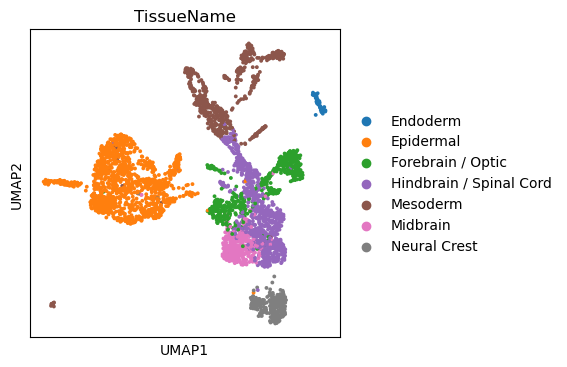

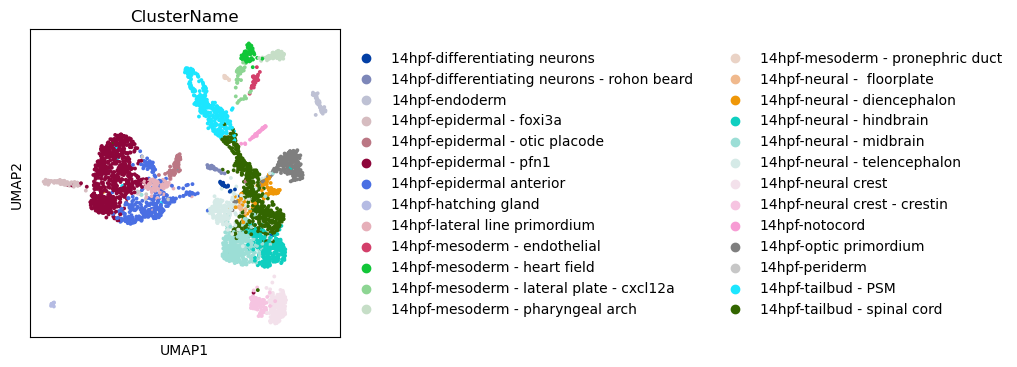

In [164]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(4,4))
sc.pl.umap(scrna, color=['TissueName'], ax=ax)
fig, ax = plt.subplots(figsize=(4,4))
sc.pl.umap(scrna, color=['ClusterName'], ax=ax)

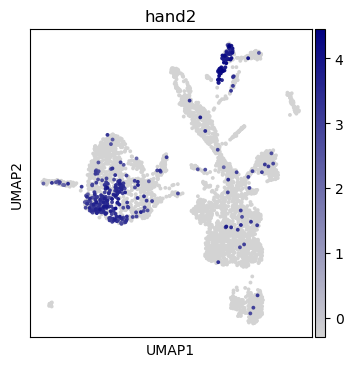

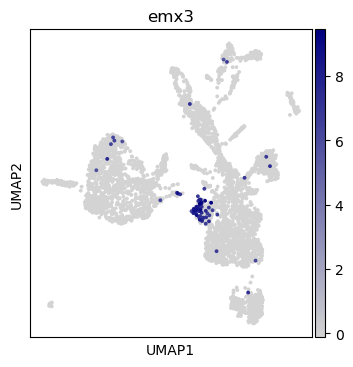

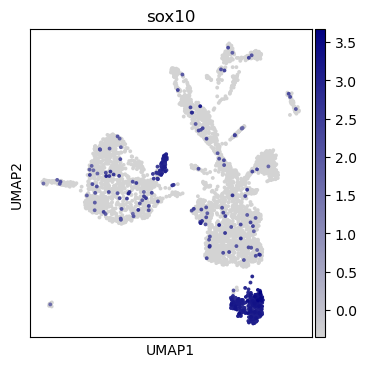

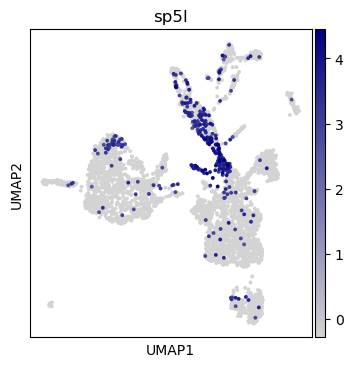

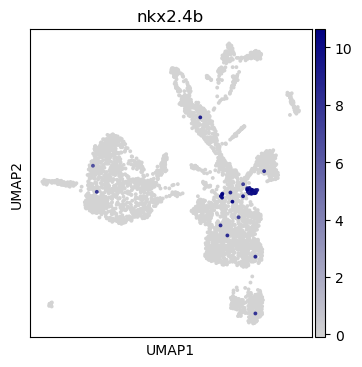

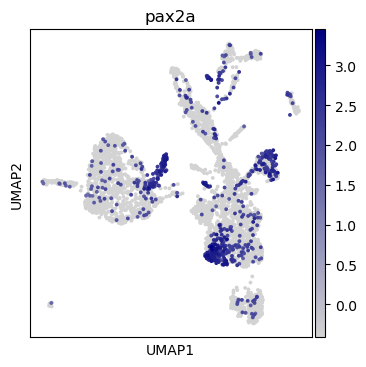

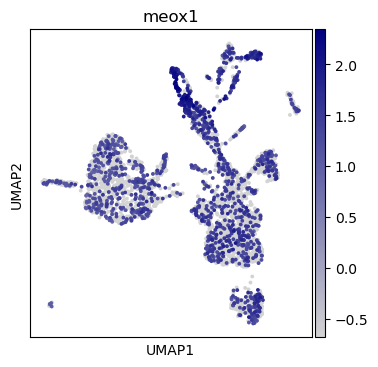

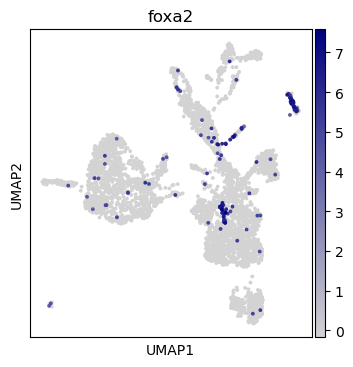

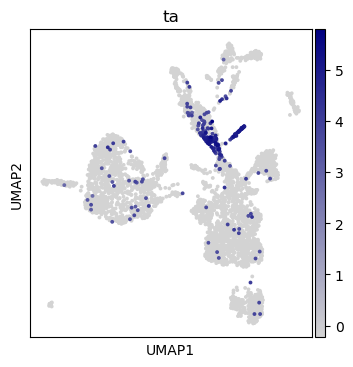

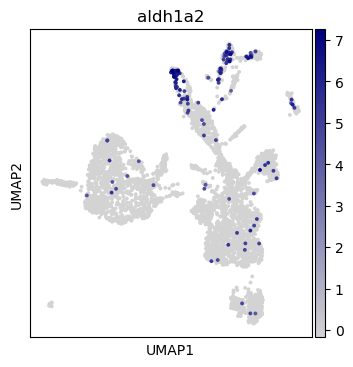

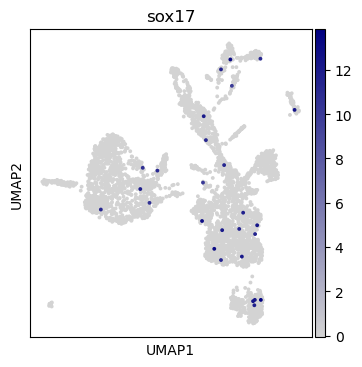

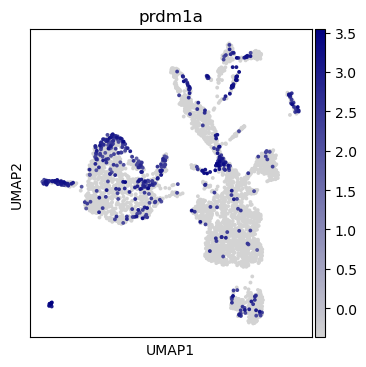

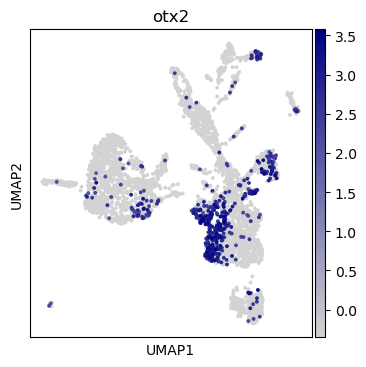

In [165]:
color_list = ["lightgray", "navy"]
my_cmap = colors.LinearSegmentedColormap.from_list("mycmap", color_list)

for g in gene_markers:
    fig, ax = plt.subplots(figsize=(4,4))
    sc.pl.umap(scrna, color=g, ax=ax, color_map=my_cmap)

# Filter scrna dataset for selected genes

In [24]:
genes = hcr.var_names#[:,hcr.var.selected_gene].var_names
hcr1 = hcr[:,genes]
scrna1 = scrna[:,genes]

In [25]:
print(hcr1.var_names)
print(scrna1.var_names)

Index(['LOC100000168', 'LOC100000332', 'LOC100000352', 'LOC100000748',
       'LOC100000753', 'LOC100001051', 'LOC100001360', 'LOC100001845',
       'LOC100001887', 'LOC100002007',
       ...
       'zp3a.1', 'zp3a.2', 'zp3b', 'zp3c', 'zranb1b', 'zranb3', 'zufsp', 'zwi',
       'zyg11', 'zyx'],
      dtype='object', name='index', length=5071)
Index(['LOC100000168', 'LOC100000332', 'LOC100000352', 'LOC100000748',
       'LOC100000753', 'LOC100001051', 'LOC100001360', 'LOC100001845',
       'LOC100001887', 'LOC100002007',
       ...
       'zp3a.1', 'zp3a.2', 'zp3b', 'zp3c', 'zranb1b', 'zranb3', 'zufsp', 'zwi',
       'zyg11', 'zyx'],
      dtype='object', name='index', length=5071)


In [26]:
hcr1.obs['batch'] = 'hcr'

Trying to set attribute `.obs` of view, copying.


In [27]:
scrna1.obs['batch'] = 'scrna'

Trying to set attribute `.obs` of view, copying.


In [28]:
hcr1

AnnData object with n_obs × n_vars = 20663 × 5071
    obs: 'x', 'y', 'z', 'density', 'h2bgfp', 'batch'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'selected_gene'

In [29]:
scrna1

AnnData object with n_obs × n_vars = 3953 × 5071
    obs: 'n_counts', 'unique_cell_id', 'cell_names', 'library_id', 'batch', 'ClusterID', 'ClusterName', 'TissueID', 'TissueName', 'TimeID'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'ClusterName_colors', 'TissueName_colors', 'hvg', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [30]:
# reload(funcs)
# %matplotlib notebook

# fig = funcs.visualize_marker_distribution_adatas(hcr1, scrna1, 
#                                           list(scrna1.var_names), gene_highlight=gene_markers, 
#                                           n_cols=5, figsize=(8,20), ylog=True)

# Try ingest from scanpy

In [173]:
sc.tl.ingest(hcr1, scrna1, obs=['TissueName', 'ClusterName'], embedding_method='umap')

In [174]:
hcr1

AnnData object with n_obs × n_vars = 20663 × 5071
    obs: 'x', 'y', 'z', 'density', 'h2bgfp', 'batch', 'TissueName', 'ClusterName'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'selected_gene'
    obsm: 'rep', 'X_umap'

In [175]:
scrna1

AnnData object with n_obs × n_vars = 3953 × 5071
    obs: 'n_counts', 'unique_cell_id', 'cell_names', 'library_id', 'batch', 'ClusterID', 'ClusterName', 'TissueID', 'TissueName', 'TimeID'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'ClusterName_colors', 'TissueName_colors', 'hvg', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [ ]:
mapped_name = os.path.join('..','HCR_time_course','mapped_transfer_hpf12.h5ad')

hcr1.write(filename=mapped_name)



# Visualization

In [31]:
hcr1 = sc.read_h5ad(os.path.join('..','HCR_time_course','mapped_transfer_hpf12.h5ad'))

In [32]:
hcr1.obs

,x,y,z,density,h2bgfp,batch,TissueName,ClusterName
0,0.143843,-0.589749,-0.746606,36.0,81.2500,hcr,Hindbrain / Spinal Cord,14hpf-neural - hindbrain
1,0.138826,-0.561993,-0.769595,35.0,98.5700,hcr,Hindbrain / Spinal Cord,14hpf-neural - hindbrain
2,0.203333,-0.514528,-0.783963,39.0,93.2125,hcr,Hindbrain / Spinal Cord,14hpf-neural - hindbrain
3,0.065075,-0.566713,-0.791147,38.0,153.2850,hcr,Midbrain,14hpf-neural - midbrain
4,0.111995,-0.540200,-0.795458,40.0,145.2675,hcr,Epidermal,14hpf-epidermal - pfn1
...,...,...,...,...,...,...,...,...
23606,-0.207751,0.623114,0.799933,33.0,145.1375,hcr,Epidermal,14hpf-epidermal - pfn1
23607,-0.248686,0.616134,0.791312,26.0,136.7125,hcr,Neural Crest,14hpf-neural crest
23608,-0.298534,0.612685,0.776943,26.0,113.2275,hcr,Epidermal,14hpf-epidermal - pfn1
23609,-0.257693,0.630868,0.776943,30.0,128.1500,hcr,Neural Crest,14hpf-neural crest


<IPython.core.display.Javascript object>


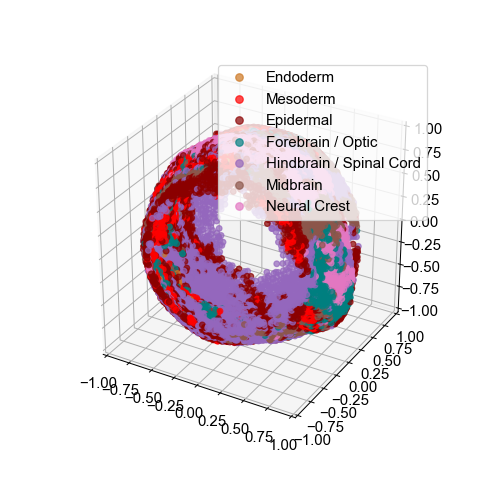

In [37]:
%matplotlib notebook
from matplotlib.colors import ListedColormap

from mpl_toolkits.mplot3d import Axes3D
df = hcr1.obs
tissuenames = ['Endoderm', 'Mesoderm', 'Epidermal', 'Forebrain / Optic',
               'Hindbrain / Spinal Cord', 'Midbrain', 'Neural Crest']
c = [ tissuenames.index(i) for i in hcr1.obs.TissueName ]
# ax.imshow(img_gauss[z])
palette=[
    '#CC7722',
    '#FF0000',
    '#8B0000',
    '#008080',
    '#9467bd',
    '#8c564b',
    '#e377c2',
]
colours = ListedColormap(palette)

fig = plt.figure(figsize=(6,6))
# fig.suptitle(gene_markers[i], fontsize=16)
ax = fig.add_subplot(projection='3d')

# ax.imshow(img_gauss[z])
scatter = ax.scatter(df.x, df.y, df.z, c=c, cmap=colours, alpha=0.7)

plt.legend(scatter.legend_elements()[0], tissuenames)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)
ax.set_box_aspect([1,1,1])

In [178]:
print('\n hcr')
for t in list(set(hcr1.obs.TissueName)):
    print(t, len(hcr1.obs[hcr1.obs.TissueName==t]))

print('\n scrna')
for t in list(set(scrna1.obs.TissueName)):
    print(t, len(scrna1.obs[scrna1.obs.TissueName==t]))


 hcr
Endoderm 159
Epidermal 4750
Midbrain 1586
Hindbrain / Spinal Cord 6558
Mesoderm 3430
Neural Crest 1497
Forebrain / Optic 2683

 scrna
Endoderm 57
Epidermal 1293
Midbrain 340
Hindbrain / Spinal Cord 869
Mesoderm 584
Neural Crest 283
Forebrain / Optic 527


In [102]:
# %matplotlib notebook

# from mpl_toolkits.mplot3d import Axes3D
# df = hcr1.obs
# clusternames = list(set(df.ClusterName))
# c = [ clusternames.index(i) for i in df.ClusterName ]

# fig = plt.figure(figsize=(12,12))
# # fig.suptitle(gene_markers[i], fontsize=16)
# ax = fig.add_subplot(projection='3d')

# # ax.imshow(img_gauss[z])
# scatter = ax.scatter(df.x,df.y,df.z,c=c, cmap = 'rainbow', alpha=0.8)

# plt.legend(scatter.legend_elements()[0], clusternames)
# ax.set_box_aspect([1,1,1])

In [103]:
# %matplotlib notebook

# from mpl_toolkits.mplot3d import Axes3D

# types = list(set(hcr1.obs.TissueName))
# for t in types:
#     df = hcr1.obs
#     clusternames = list(set(df.TissueName))

#     fig = plt.figure(figsize=(4,4))
#     # fig.suptitle(gene_markers[i], fontsize=16)
#     ax = fig.add_subplot(projection='3d')

#     # ax.imshow(img_gauss[z])
#     scatter = ax.scatter(df.x,df.y,df.z,c='gray', alpha=0.01)
    
#     df2 = hcr1[hcr1.obs.TissueName==t].obs
# #     print(df2)
#     scatter = ax.scatter(df2.x,df2.y,df2.z, alpha=1, s=1)
    
#     ax.set_title(t)

#     plt.legend(scatter.legend_elements()[0], clusternames)
#     ax.set_box_aspect([1,1,1])

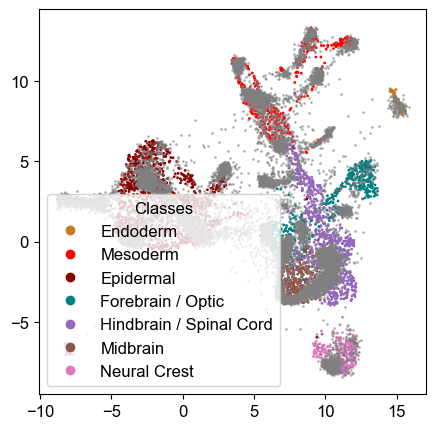

In [36]:
%matplotlib inline
from matplotlib.colors import ListedColormap

#####################
# fig, ax = plt.subplots()
# sc.pl.umap(scrna1.concatenate(hcr1), color=['batch'], ax=ax)


#####################
fig, ax = plt.subplots(figsize=(5,5))
tissuenames = ['Endoderm', 'Mesoderm', 'Epidermal', 'Forebrain / Optic',
               'Hindbrain / Spinal Cord', 'Midbrain', 'Neural Crest']
c = [ tissuenames.index(i) for i in scrna1.obs.TissueName ]
# ax.imshow(img_gauss[z])
palette=[
    '#CC7722',
    '#FF0000',
    '#8B0000',
    '#008080',
    '#9467bd',
    '#8c564b',
    '#e377c2',
]
colours = ListedColormap(palette)
scatter = ax.scatter(scrna1.obsm['X_umap'][:,0],scrna1.obsm['X_umap'][:,1],
          c=c, cmap=colours, s=1, rasterized=False)
legend1 = ax.legend(handles=scatter.legend_elements()[0],
                    loc="lower left", title="Classes", labels = tissuenames)

scatter1 = ax.scatter(hcr1.obsm['X_umap'][:,0],hcr1.obsm['X_umap'][:,1],
          c = 'gray', s=1, alpha=0.5, rasterized=True)
fig.savefig('integrated1.pdf', dpi=300)

#####################
# fig, ax = plt.subplots(figsize=(5,5))
# ax = sc.pl.umap(scrna1, color=['ClusterName'], show=False, ax=ax)
# sc.pl.umap(hcr1, show=True, ax=ax, size=100)

In [ ]:
# merged = scrna1.concatenate(hcr1)
# sc.tl.embedding_density(merged, groupby='batch')

In [ ]:
# sc.pl.embedding_density(merged, groupby='batch')

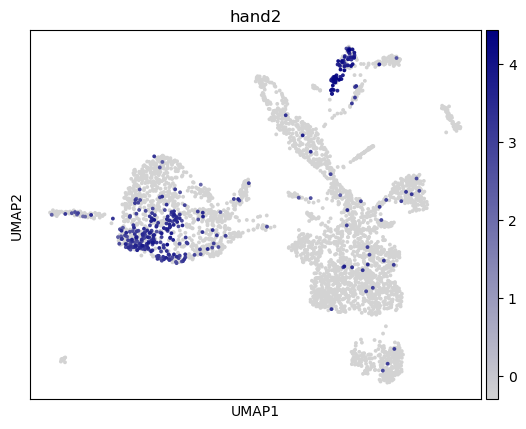

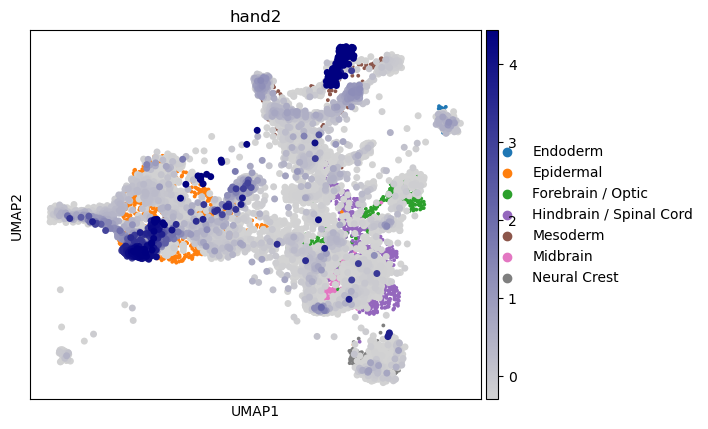

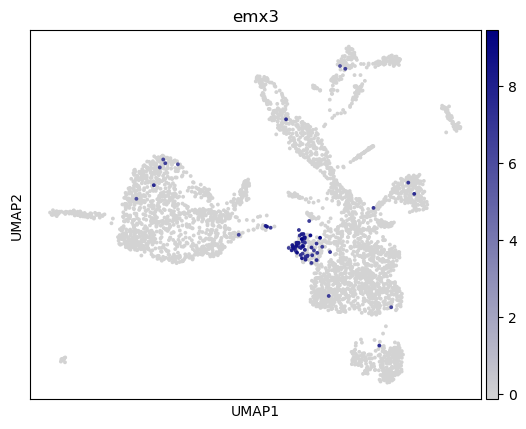

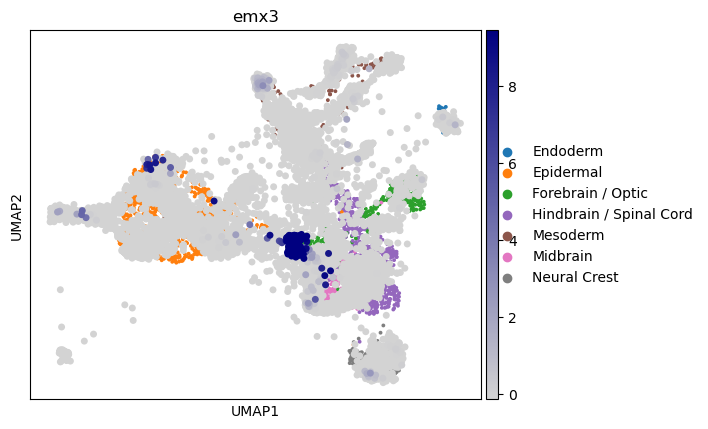

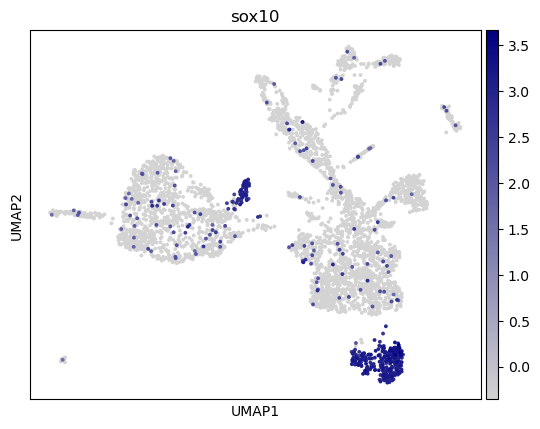

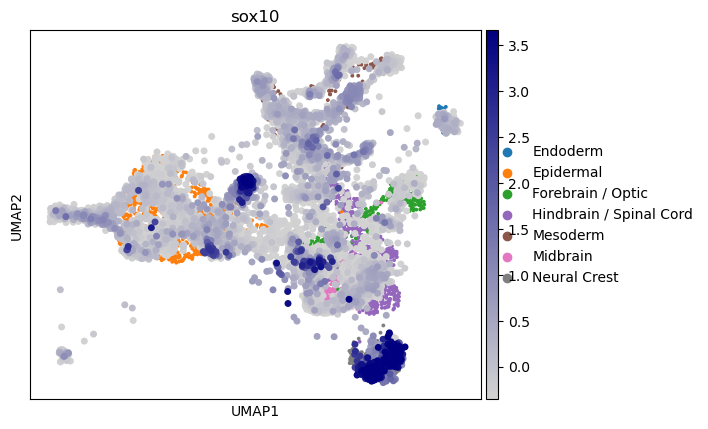

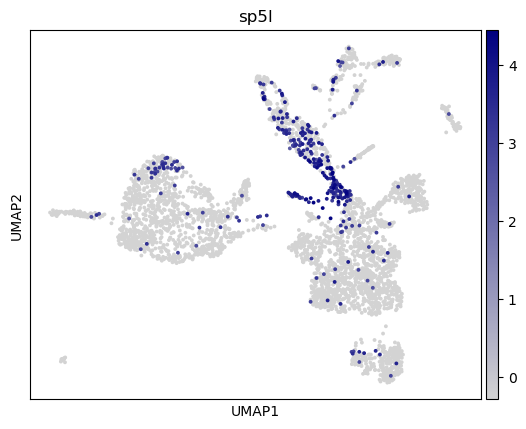

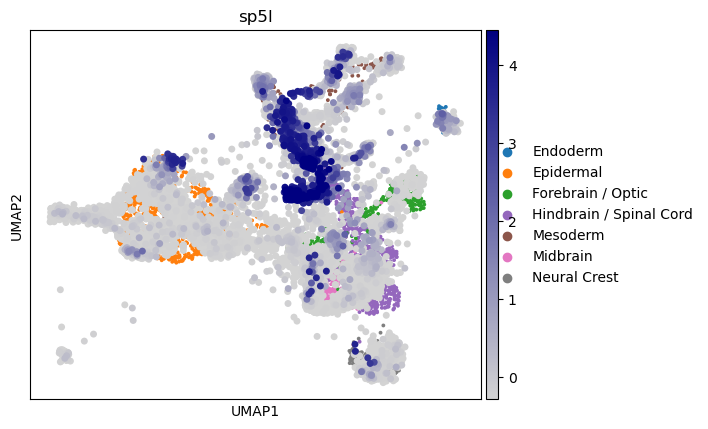

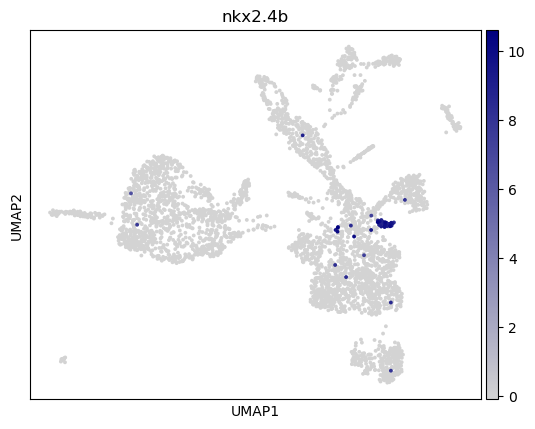

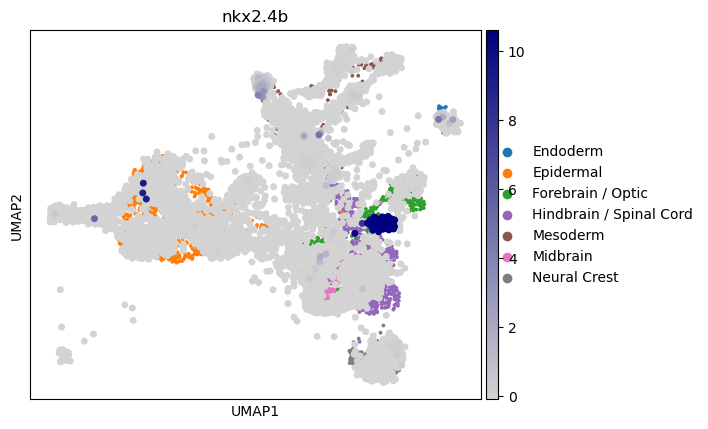

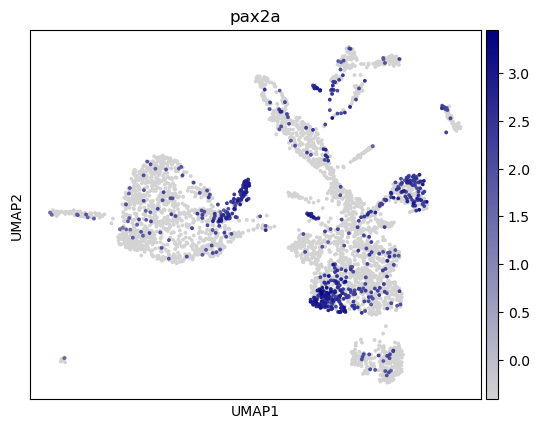

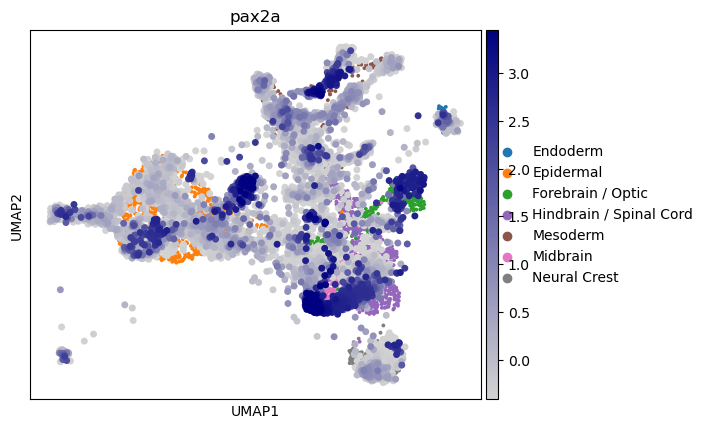

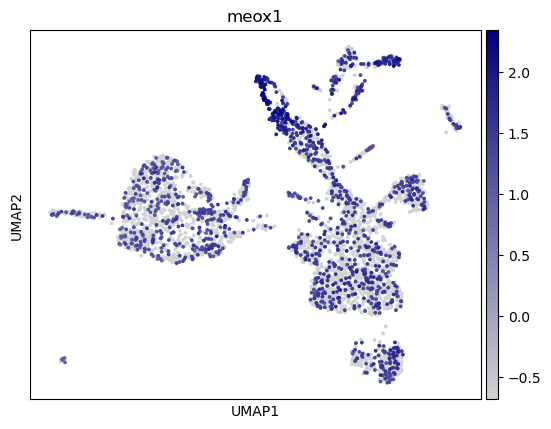

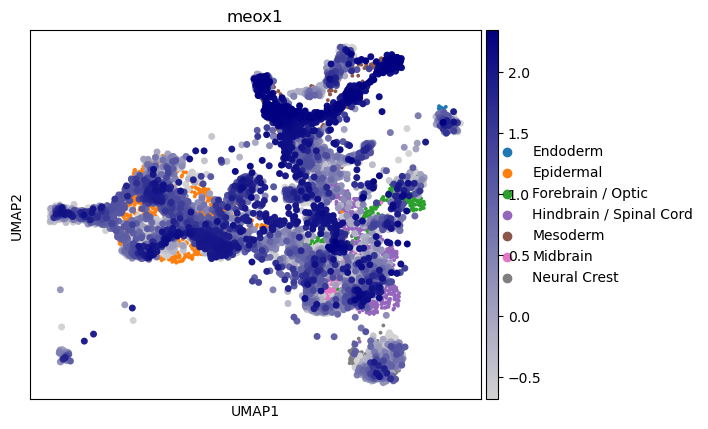

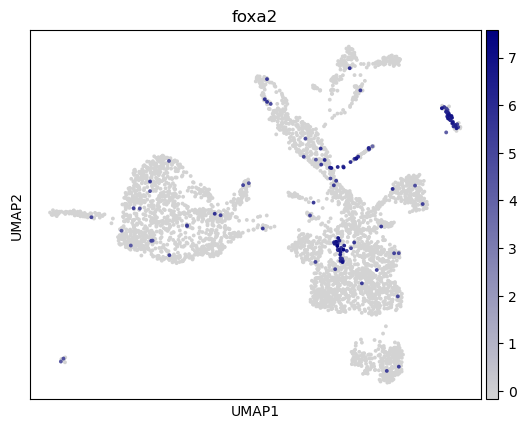

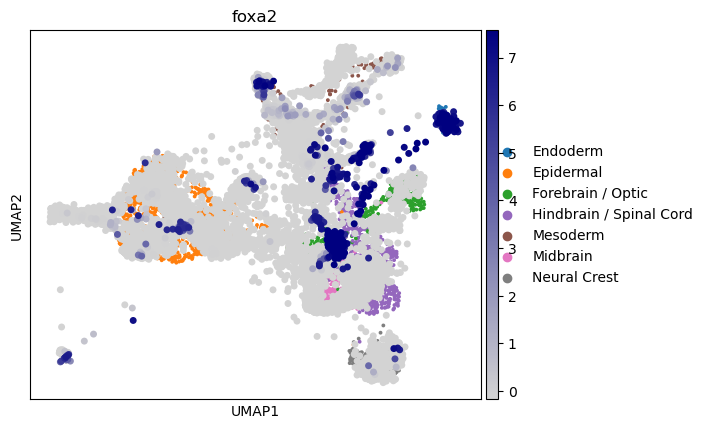

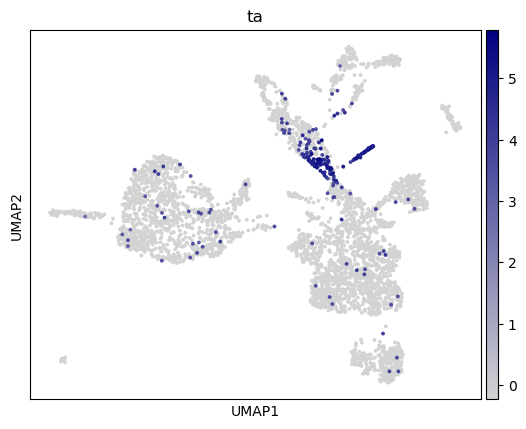

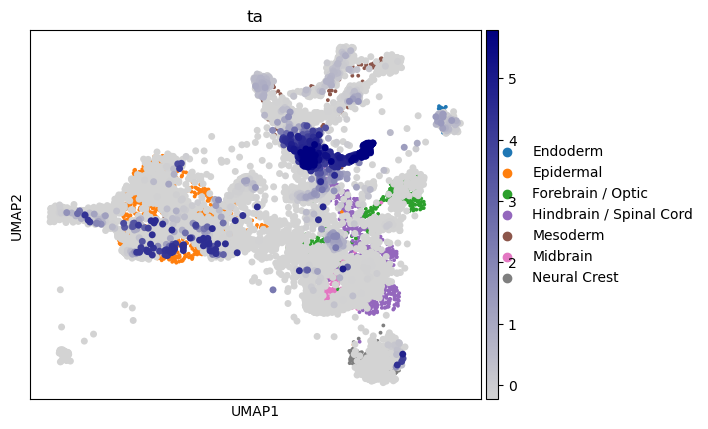

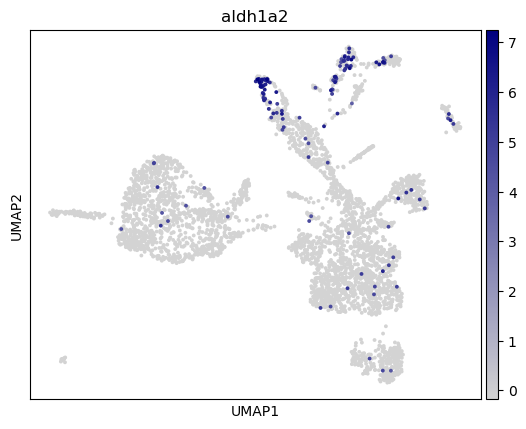

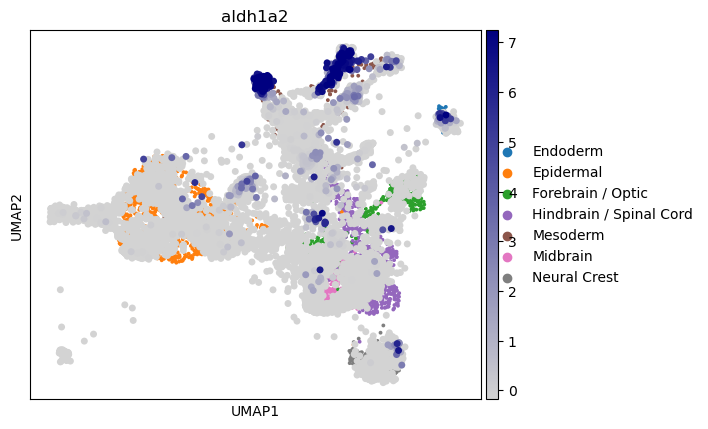

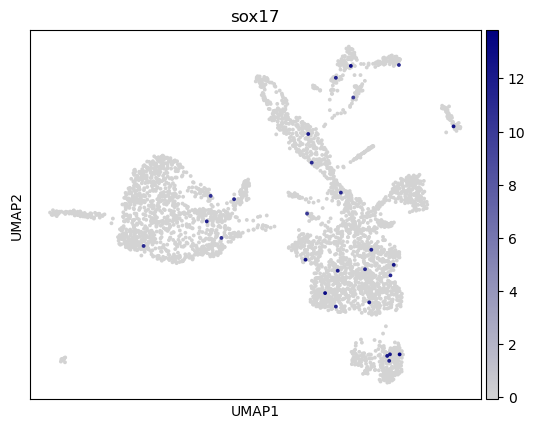

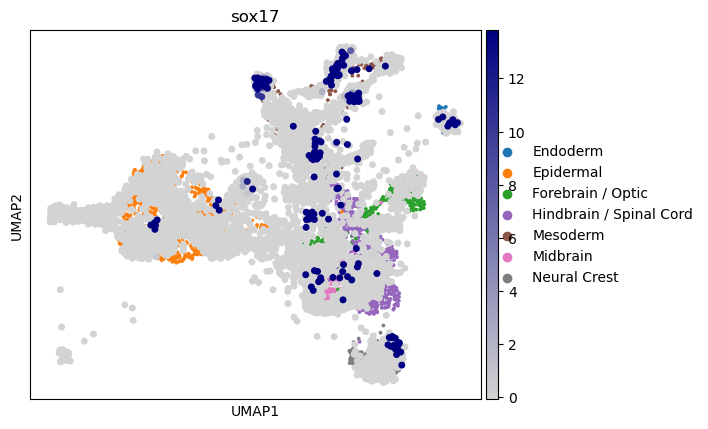

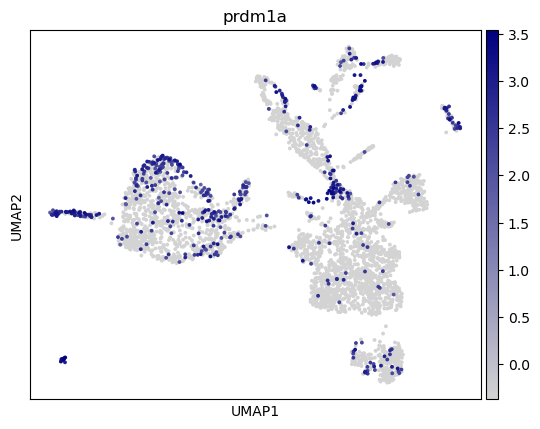

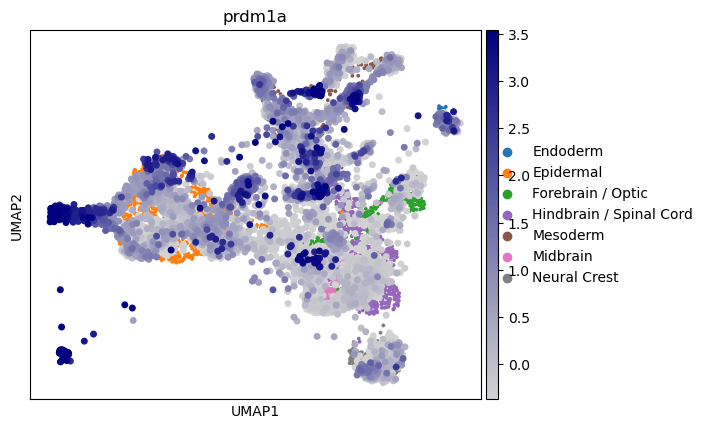

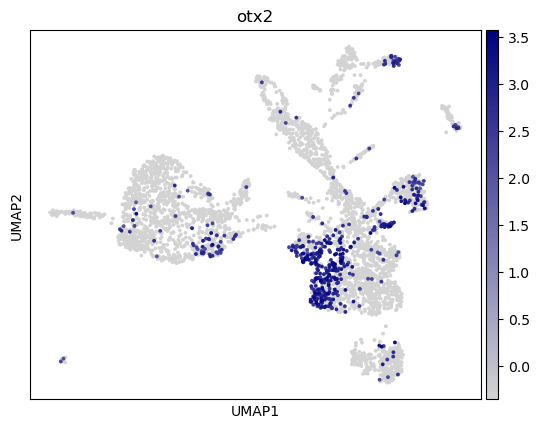

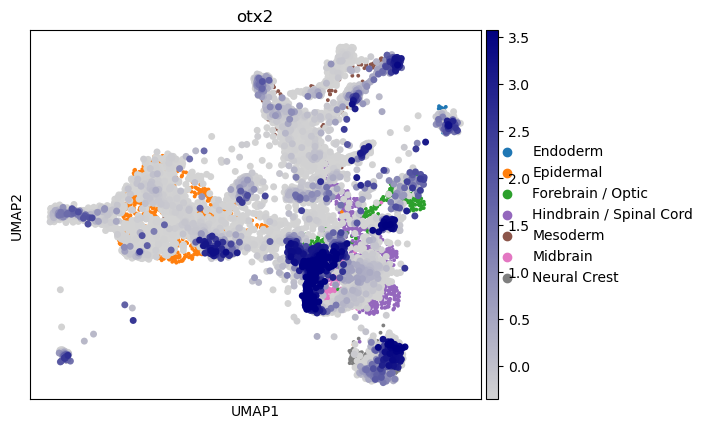

In [180]:
%matplotlib inline

hcr1.obs = hcr1.obs.rename(columns={
    'hand2':'ch-hand2', 
    'emx3':'ch-emx3', 
    'sox10':'ch-sox10', 
    'sp5l':'ch-sp5l' ,
    'nkx2.4b':'ch-nkx2.4b'})

color_list = ["lightgray", "navy"]
my_cmap = colors.LinearSegmentedColormap.from_list("mycmap", color_list)

for g in gene_markers:
    ax = sc.pl.umap(scrna1, color=g, color_map=my_cmap)
    
    ax = sc.pl.umap(scrna1, color=['TissueName'], show=False)
    sc.pl.umap(hcr1, color=g, show=True, ax=ax, size=100, color_map=my_cmap)

In [106]:
# reload(funcs)
# %matplotlib notebook

# for tn in list(set(scrna1.obs.TissueName)):
#     print(tn)
#     fig = funcs.visualize_marker_distribution_adatas(hcr1[hcr1.obs.TissueName==tn], 
#                                           scrna1[scrna1.obs.TissueName==tn], 
#                                           list(scrna1.var_names), gene_highlight=gene_markers, 
#                                           n_cols=5, figsize=(8,20), ylog=True)

# Visualize marker genes

In [196]:
marker_genes_dict = {
    'Endoderm':['sox17','sox2','epcam'],
 'Epidermal':['cd9b', 'cdh1', 'mdka'],
 'Forebrain / Optic':['cfl1l', 'sox19a'],
 'Hindbrain / Spinal Cord':['cldni', 'tuba1a', 'gfap'],
 'Mesoderm':['f11r.1', 'myh9a', 'nova2', 'sox3', 'eng2b', 'cbr1'],
 'Midbrain':['pfn1', 'mdka', 'zic2b'],
 'Neural Crest':['cdh1', 'krt4', 'foxp4', 'prtga', 'nbas']
}

In [111]:
sc.tl.rank_genes_groups(scrna1, 'TissueName', method='wilcoxon', use_raw=False)

C:\Users\nicol\anaconda3\envs\scaling\lib\site-packages\scanpy\tools\_rank_genes_groups.py:419: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


In [125]:
scrna1.uns['rank_genes_groups']['names']

rec.array([('pltp', 'epcam', 'sox2', 'dnd1', 'sox19a', 'LOC100537766', 'nova2', 'tfap2a'),
           ('cd9b', 'cdh1', 'mdka', 'tdrd7a', 'nova2', 'si:dkey-261h17.1', 'prtga', 'sox10'),
           ('si:ch211-201m7.3', 'cfl1l', 'six3b', 'ca15b', 'tuba1c', 'fn1b', 'sox19a', 'ednrab'),
           ...,
           ('LOC101884747', 'LOC100334443', 'LOC101884747', 'si:ch211-147d7.5', 'epcam', 'pcdh19', 'fn1a', 'mdka'),
           ('cyp2p6', 'hspb1', 'si:ch211-147d7.5', 'cyp2p6', 'wu:fb77a09', 'prtga', 'LOC103910167', 'akap12b'),
           ('si:ch211-147d7.5', 'nova2', 'LOC103910167', 'LOC101884747', 'krt8', 'zfp36l1a', 'wu:fb77a09', 'alcamb')],
          dtype=[('Endoderm', 'O'), ('Epidermal', 'O'), ('Forebrain / Optic', 'O'), ('Germline', 'O'), ('Hindbrain / Spinal Cord', 'O'), ('Mesoderm', 'O'), ('Midbrain', 'O'), ('Neural Crest', 'O')])

In [131]:
scrna1.uns['rank_genes_groups']['names'][7]

('cdh1', 'krt4', 'foxp4', 'spint2', 'prtga', 'wu:fb77a09', 'zbtb16a', 'nbas')

C:\Users\nicol\anaconda3\envs\scaling\lib\site-packages\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


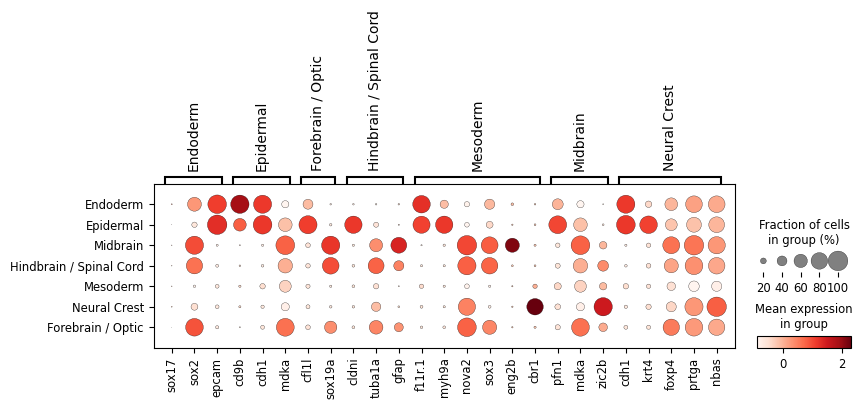

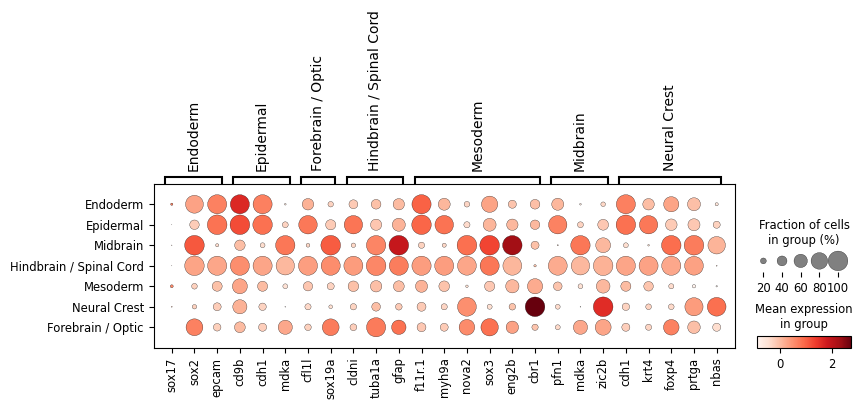

In [204]:

fig, ax = plt.subplots(figsize=(9,3))
sc.pl.dotplot(scrna1[scrna1.obs.TissueName!='Germline'], marker_genes_dict, 'TissueName', dendrogram=False, categories_order = set(scrna1.obs.TissueName), ax = ax)
fig.savefig('dendogram0.pdf')

fig, ax = plt.subplots(figsize=(9,3))
sc.pl.dotplot(hcr1, marker_genes_dict, 'TissueName', dendrogram=False, categories_order = set(scrna1.obs.TissueName),ax=ax)
fig.savefig('dendogram1.pdf')